In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest

%matplotlib inline

In [2]:
data = pd.read_csv('creditCard.csv',sep=',')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.isnull().values.any()

False

C:\Users\KALPANA RANI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

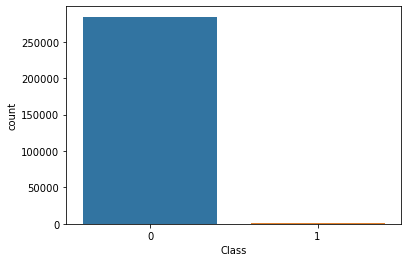

In [6]:
sns.countplot('Class',data=data)

In [7]:
fraud=data[data['Class']==1]
valid=data[data['Class']==0]

In [8]:
fraud.shape , valid.shape

((492, 31), (284315, 31))

In [9]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

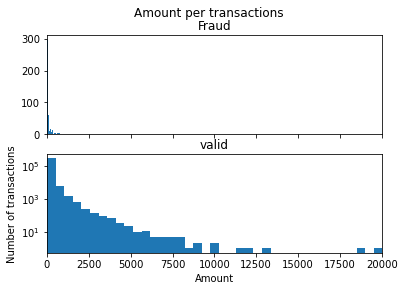

In [10]:
f,(ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transactions')
bins =50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title("Fraud")
ax2.hist(valid.Amount, bins = bins)
ax2.set_title("valid")
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

In [11]:
data_sample =data.sample(frac =0.54,random_state = 1)
data_sample.shape

(153796, 31)

In [12]:
Fraud = data_sample[data_sample['Class'] == 1]
Valid = data_sample[data_sample['Class'] == 0]

In [13]:
outlier_fun = len(Fraud)/float(len(Valid))
outlier_fun

0.001641223362684312

<AxesSubplot:>

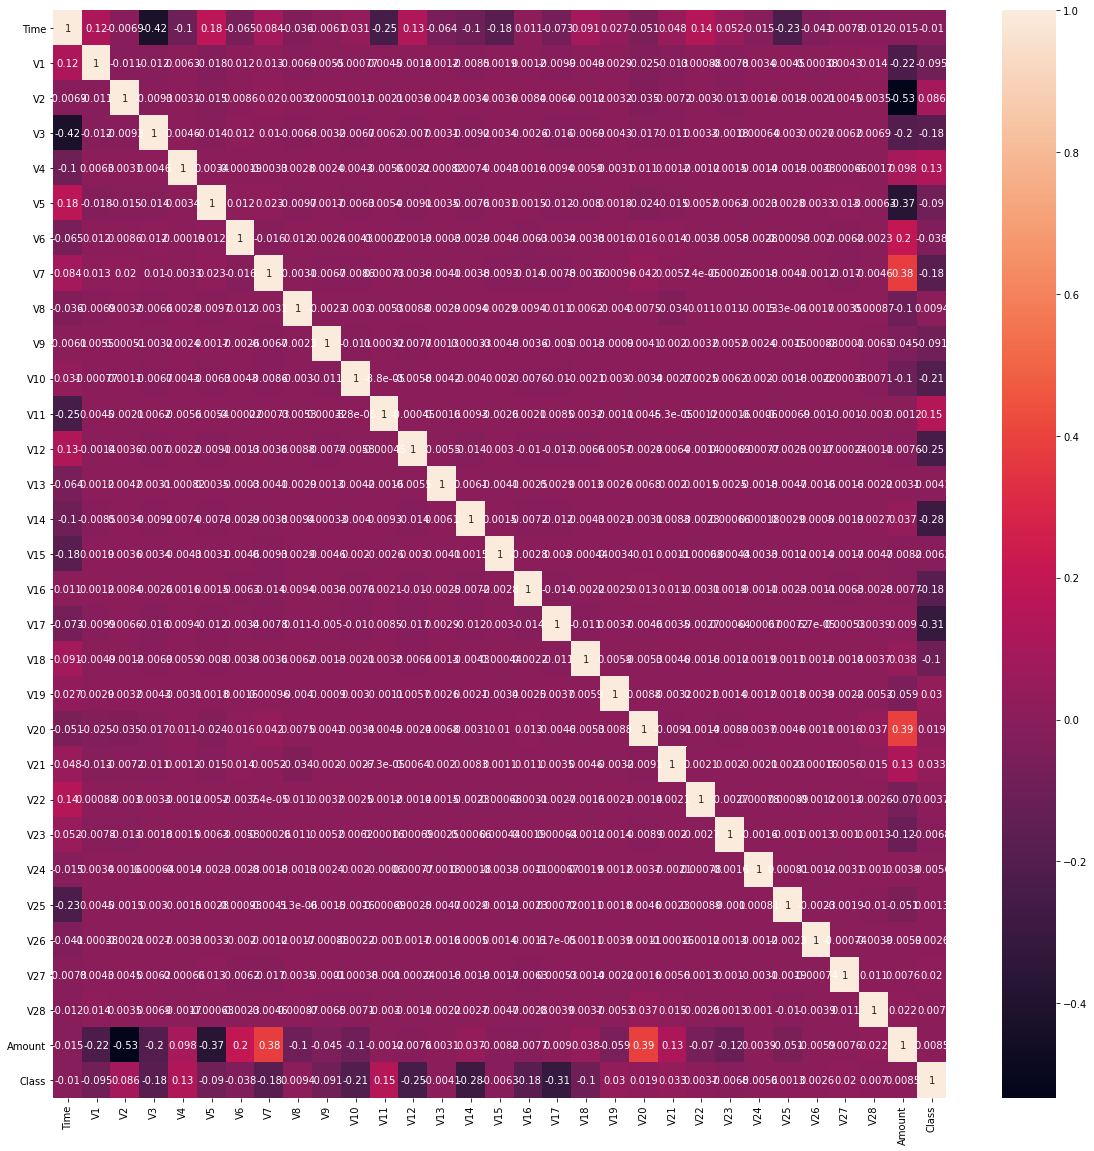

In [14]:
corr = data_sample.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot = True)

In [15]:
columns = data_sample.columns.tolist()
columns = [c for c in columns if c not in ["Class"]]
X = data_sample[columns]
y = data_sample['Class']
state = np.random.RandomState(42)
X_outliers = state.uniform(low = 0, high = 1, size = (X.shape[0],X.shape[1]))
X.shape, y.shape

((153796, 30), (153796,))

In [16]:
classifier = {"Isolation Forest":IsolationForest(n_estimators = 100, max_samples = len(X),contamination = outlier_fun, random_state = state, verbose = 0)}

In [17]:
type(classifier)

dict

In [18]:
n_outliers = len(fraud)
for i ,(clf_name ,clf) in enumerate(classifier.items()):
    clf.fit(X)
    scores_prediction = clf.decision_function(X)
    y_pred = clf.predict(X)
    y_pred[y_pred ==1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred != y).sum()
print("{} : {}".format(clf_name,n_errors))


Isolation Forest : 363


In [19]:
accuracy_score(y,y_pred)

0.99763973055216

In [29]:
print("Classification Report :")
print(classification_report(y, y_pred))


Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    153544
           1       0.28      0.28      0.28       252

    accuracy                           1.00    153796
   macro avg       0.64      0.64      0.64    153796
weighted avg       1.00      1.00      1.00    153796



In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y, y_pred)


In [31]:
cm

array([[153362,    182],
       [   181,     71]], dtype=int64)